In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Sumber dataset: https://www.kaggle.com/iabhishekofficial/mobile-price-classification 

## Deskripsi Dataset
* `pc` : Primary Camera mega pixels
* `fc` : Front Camera mega pixels
* `sc_h` : Screen Height of mobile in cm
* `sc_w` : Screen Width of mobile in cm
* `m_dep` : Mobile Depth in cm
* `px_width` : Pixel Resolution Width
* `px_height` : Pixel Resolution Height
* `ram` : Random Access Memory in Mega Bytes
* `int_memory` : Internal Memory in Giga Bytes
* `four_g` : Has 4G or not
* `three_g` : Has 3G or not
* `dual_sim` : Has dual sim support or not
* `battery_power` : Total energy a battery can store in one time measured in mAh
* `touch_screen` : Has touch screen or not
* `clock_speed` : speed at which microprocessor executes instructions
* `n_cores` : Number of cores of processor
* `wifi` : Has wifi or not
* `blue` : Has bluetooth or not
* `mobile_wt` : Weight of mobile phone
* `talk_time` : longest time that a single battery charge will last when you are
constantly talking on the phone
* `price_range` : This is the target variable with value of 0(low cost), 1(medium cost),
2(high cost) and 3(very high cost)


<b>Target</b> : Implementasi PCA untuk mereduksi komponen

# Load Data

In [2]:
mobile_prices = pd.read_csv("mobile_prices.csv", index_col= 0 )

print("Data has size:", mobile_prices.shape)
mobile_prices.head()

Data has size: (2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,No,2.2,No,1,No,7.0,0.6,188,2,...,20,756,2549.0,9,7.0,19,No,No,Yes,1
1,1021,Yes,0.5,Yes,0,Yes,53.0,0.7,136,3,...,905,1988,2631.0,17,3.0,7,Yes,Yes,No,2
2,563,Yes,0.5,Yes,2,Yes,41.0,0.9,145,5,...,1263,1716,2603.0,11,2.0,9,Yes,Yes,No,2
3,615,Yes,2.5,No,0,No,10.0,0.8,131,6,...,1216,1786,2769.0,16,8.0,11,Yes,No,No,2
4,1821,Yes,1.2,No,13,Yes,NaN,0.6,141,2,...,1208,1212,1411.0,8,2.0,15,Yes,Yes,No,1


# 1.Ringkasan mengenai data

In [3]:
# Mengecok info pada setiap kolom
mobile_prices.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   object 
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   object 
 6   int_memory     1898 non-null   float64
 7   m_dep          1980 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            1874 non-null   float64
 14  sc_h           2000 non-null   int64  
 15  sc_w           1972 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   object 
 18  touch_sc

In [4]:
# Melihat deskripsi statistik dari kelompok fitur numerik
mobile_prices.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
count,2000.000000,2000.000000,2000.000000,1898.000000,1980.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1874.000000,2000.000000,1972.000000,2000.000000,2000.000000
mean,1238.518500,1.522250,4.309500,31.969968,0.501061,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.168623,12.306500,5.776876,11.011000,1.500000
std,439.418206,0.816004,4.341444,18.117366,0.288317,35.399655,2.287837,6.064315,443.780811,432.199447,1082.760885,4.213245,4.356618,5.463955,1.118314
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1206.500000,9.000000,2.000000,6.000000,0.750000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.500000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3067.000000,16.000000,9.000000,16.000000,2.250000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,3.000000


In [5]:
# Melihat deskripsi statistik dari kelompok fitur kategorik
display(mobile_prices.describe(include=np.object))

c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,blue,dual_sim,four_g,three_g,touch_screen,wifi
count,2000,2000,2000,2000,1874,2000
unique,2,2,2,2,2,2
top,No,Yes,Yes,Yes,Yes,Yes
freq,1010,1019,1043,1523,942,1014


# 2. Eksplorasi Data

In [6]:
# Fungsi yang digunakan untuk memvisualisasikan distribusi frekuensi pada kolom kategorik
def countplot(df, column):
    return sns.countplot(x= column, data= df)

<AxesSubplot:xlabel='four_g', ylabel='count'>

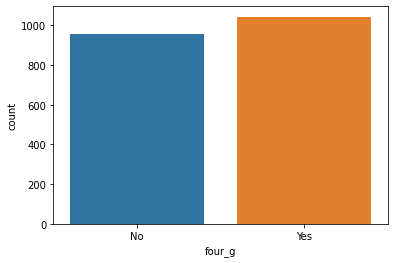

In [7]:
countplot(mobile_prices, 'four_g')

<AxesSubplot:xlabel='three_g', ylabel='count'>

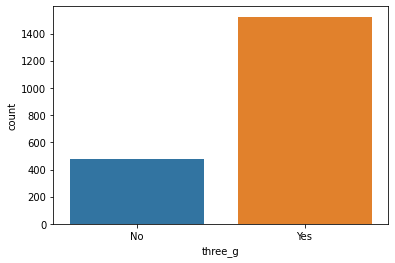

In [8]:
countplot(mobile_prices, 'three_g')

<AxesSubplot:xlabel='wifi', ylabel='count'>

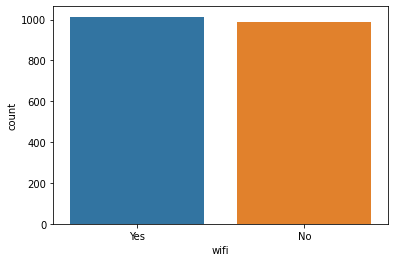

In [9]:
countplot(mobile_prices, 'wifi')

Dari visualisasi data numerik dapat kita lihat bahwa tidak semua fitur/kolom distribusinya mempengaruhi `price_range`. Untuk melakukan prediksi kita tidak menggunakan semua fitur, melainkan hanya fitur tertentu yang dianggap relevan. Salah satu fitur yang sekilas dapat kita lihat sejalan/berkorelasi dengan `price_range` adalah fitur `ram`.

Text(0.5, 1.0, 'Correlation matrix')

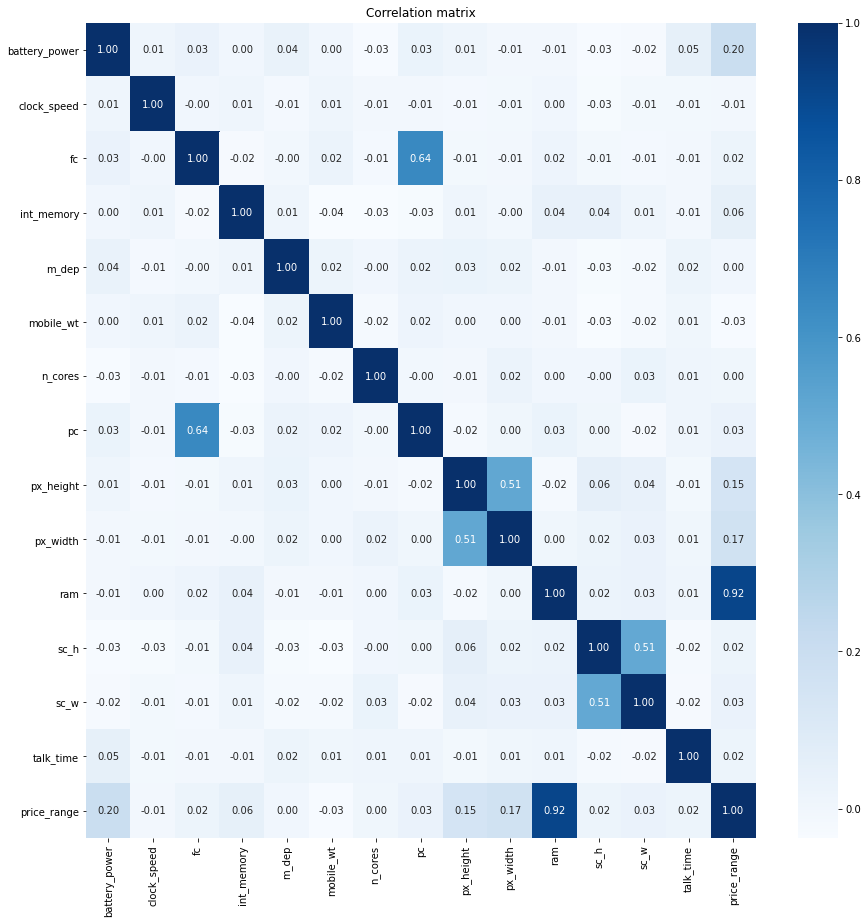

In [10]:
# Visualisasi matriks korelasi dari setiap fitur numerik
plt.figure(figsize=(15,15))

sns.heatmap(mobile_prices.select_dtypes(np.number).corr(), 
        annot=True,
        cbar = True,
        fmt="0.2f",
        cmap=plt.cm.Blues,
        xticklabels=mobile_prices.select_dtypes(np.number).columns,
        yticklabels=mobile_prices.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

Hasil diatas dapat terlihat bahwa terdapat korelasi tinggi yaitu fitur `ram` dan `price_range` dengan korelasi 0.92.

# Data Preprocessing

### Langkah penanganan *missing values*

Pra-pemrosesan data dilakukan dengan tujuan melakukan prediksi price_range dengan salah satu jenis dimensionality reduction, yaitu PCA.
Fitur yang akan digunakan hanyalah fitur numerik dan perlu merlakukan  normalisasi karena fitur-fitur yang tidak dalam skala sama.

In [11]:
#cek missing vallues
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df)
    
    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

In [12]:
cek_null(mobile_prices)

              Total  Percent
touch_screen    126    0.063
ram             126    0.063
int_memory      102    0.051
sc_w             28    0.014
m_dep            20    0.010


In [13]:
mobile_prices_numbers = mobile_prices.select_dtypes(np.number)
mobile_prices_numbers.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7.0,0.6,188,2,2,20,756,2549.0,9,7.0,19,1
1,1021,0.5,0,53.0,0.7,136,3,6,905,1988,2631.0,17,3.0,7,2
2,563,0.5,2,41.0,0.9,145,5,6,1263,1716,2603.0,11,2.0,9,2
3,615,2.5,0,10.0,0.8,131,6,9,1216,1786,2769.0,16,8.0,11,2
4,1821,1.2,13,NaN,0.6,141,2,14,1208,1212,1411.0,8,2.0,15,1


In [14]:
# Mengisi nilai ram dan int_memory dengan median karena datanya merupakan skewed
col = ["ram", "int_memory"]
for c in col:
    median = mobile_prices_numbers[c].median()
    mobile_prices_numbers[c] = mobile_prices_numbers[c].fillna(median)

cek_null(mobile_prices_numbers)

       Total  Percent
sc_w      28    0.014
m_dep     20    0.010


c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\asus vivobook user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [15]:
#Drop missing values untuk missing values yang sedikit 
mobile_prices_cleaned = mobile_prices_numbers.dropna()
cek_null(mobile_prices_cleaned)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [16]:
mobile_prices_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1952 non-null   int64  
 1   clock_speed    1952 non-null   float64
 2   fc             1952 non-null   int64  
 3   int_memory     1952 non-null   float64
 4   m_dep          1952 non-null   float64
 5   mobile_wt      1952 non-null   int64  
 6   n_cores        1952 non-null   int64  
 7   pc             1952 non-null   int64  
 8   px_height      1952 non-null   int64  
 9   px_width       1952 non-null   int64  
 10  ram            1952 non-null   float64
 11  sc_h           1952 non-null   int64  
 12  sc_w           1952 non-null   float64
 13  talk_time      1952 non-null   int64  
 14  price_range    1952 non-null   int64  
dtypes: float64(5), int64(10)
memory usage: 244.0 KB


Dari data diatas terlihat bahwa sudah tidak ada missing values

## Menyiapkan format data

In [17]:
# Split data 
X = mobile_prices_cleaned.drop(['price_range'], axis=1)
y = mobile_prices_cleaned['price_range']
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7.0,0.6,188,2,2,20,756,2549.0,9,7.0,19
1,1021,0.5,0,53.0,0.7,136,3,6,905,1988,2631.0,17,3.0,7
2,563,0.5,2,41.0,0.9,145,5,6,1263,1716,2603.0,11,2.0,9
3,615,2.5,0,10.0,0.8,131,6,9,1216,1786,2769.0,16,8.0,11
4,1821,1.2,13,32.0,0.6,141,2,14,1208,1212,1411.0,8,2.0,15


In [18]:
# Melakukan normalisasi data
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

# Step by Step PCA

PCA merupakan algoritma yang umum digunakan untuk melakukan dimensionality reduction. 

PCA bekerja dengan memanfaatkan transformasi ortogonal untuk mengubah sekumpulan data dengan kelompok fitur tertentu menjadi satu himpunan fitur yang independen (tidak berkorelasi linier) yang disebut dengan komponen utama (principal components).

### Nilai rata-rata dari setiap fitur!

In [19]:
mean_vector = np.mean(X_scaled, axis=0)
mean_vector

array([0.49194735, 0.40778689, 0.22624569, 0.48352393, 0.44592441,
       0.50129781, 0.50175644, 0.4942623 , 0.32946481, 0.5021593 ,
       0.49867313, 0.52126025, 0.32089595, 0.5005123 ])

### Centering data dengan mengurangi setiap kolom dengan nilai rata-rata

In [20]:
X_centered = X_scaled - mean_vector
X_centered

array([[-0.26415844,  0.27221311, -0.17361411, ..., -0.23554596,
         0.06799294,  0.44393215],
       [-0.14458596, -0.40778689, -0.22624569, ...,  0.33588261,
        -0.15422928, -0.22273452],
       [-0.45053119, -0.40778689, -0.12098253, ..., -0.09268882,
        -0.20978484, -0.11162341],
       ...,
       [ 0.48600856,  0.43221311, -0.22624569, ..., -0.09268882,
         0.23465961,  0.27726548],
       [ 0.44993642, -0.24778689, -0.17361411, ..., -0.23554596,
        -0.26534039, -0.33384563],
       [ 0.18340335, -0.24778689, -0.01571937, ...,  0.40731118,
         0.23465961,  0.44393215]])

Covariance matrix dari hasil diatas

In [21]:
X_cov = np.cov(X_centered.T)
X_cov

array([[ 8.63342014e-02,  9.20999079e-04,  2.19946682e-03,
        -2.92540694e-04,  3.02700909e-03, -2.09495135e-05,
        -2.26941811e-03,  3.23802776e-03,  9.71173259e-04,
        -7.02752022e-04,  3.96491725e-05, -2.33191120e-03,
        -1.32073959e-03,  4.59717367e-03],
       [ 9.20999079e-04,  1.06511963e-01,  5.54108444e-04,
         1.04865205e-03, -1.42163329e-03,  9.45296373e-04,
        -3.30005510e-04, -4.61705221e-04, -1.19154373e-03,
        -6.59278626e-04,  6.22009748e-04, -3.10478803e-03,
        -7.49391513e-04, -1.17717877e-03],
       [ 2.19946682e-03,  5.54108444e-04,  5.22736072e-02,
        -1.45084970e-03, -2.24102706e-04,  1.76342427e-03,
        -1.21652684e-03,  4.49174535e-02, -3.82117619e-04,
        -4.16964811e-04,  1.19744473e-03, -6.86993227e-04,
        -7.60566735e-04, -4.11209163e-04],
       [-2.92540694e-04,  1.04865205e-03, -1.45084970e-03,
         8.16040196e-02,  2.86186687e-04, -3.36548248e-03,
        -2.87514569e-03, -2.51476483e-03,  7.

Nilai eigen dan vektor eigen dari covariance matrix dan mengurutkan nilai eigen beserta vektor eigen dari yang tertinggi nilai eigen-nya

In [22]:
eigen_value, eigen_vector = np.linalg.eig(X_cov)
eigen_value

array([0.02281336, 0.03003715, 0.03425957, 0.12390943, 0.07585508,
       0.08072617, 0.08328572, 0.11736896, 0.08803869, 0.09297599,
       0.09927757, 0.10503654, 0.10839584, 0.10693827])

In [23]:
sorted_idx = sorted(range(len(eigen_value)), reverse=True, key=lambda k: eigen_value[k])
sorted_eigen = sorted(eigen_value, reverse=True)
sorted_eigen

[0.12390943009795678,
 0.11736896381276112,
 0.10839584372679203,
 0.10693827449462741,
 0.10503654092524833,
 0.0992775657448616,
 0.09297599407824485,
 0.0880386918940609,
 0.08328571839658308,
 0.08072616601909921,
 0.07585508288360318,
 0.03425956512753189,
 0.03003714686504141,
 0.02281335910898257]

Ambil k nilai terbesar pada nomor 4 sebagai dimensi terbesar yang akan digunakan pada data. Pilih k yang  sebaiknya digunakan sehingga dapat menggambarkan data dengan baik

In [53]:
threshold = 0.8
sum_of_all_eigen = sum(sorted_eigen)
ratio_of_sum_selected_eigen = 0
sum_of_selected_eigen = 0
r = 0

for eigen in sorted_eigen:
    if ratio_of_sum_selected_eigen > threshold:
        break
    sum_of_selected_eigen += eigen
    ratio_of_sum_selected_eigen = sum_of_selected_eigen/sum_of_all_eigen
    r += 1

ratio_of_sum_selected_eigen

0.8605846550902262

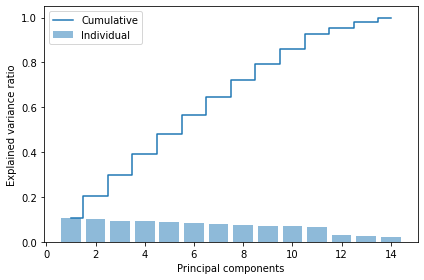

In [54]:
import matplotlib.pyplot as plt

tot = sum(np.abs(eigen_value))
var_exp = [(i / tot) for i in sorted(np.abs(eigen_value), reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, eigen_value.size + 1), var_exp, alpha=0.5, align='center',
 label='Individual')
plt.step(range(1, eigen_value.size + 1), cum_var_exp, where='mid',
 label='Cumulative')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('./fig-pca-var-exp.png', dpi=300)
plt.show()

> Dari data diatas terlihat bahwa  Jumlah komponen utama yang sebaiknya digunakan sehingga dapat menggambarkan data dengan baik adalah 10.
> Hal itu karena 0 komponen tersebut mempunyai 80.23% informasi,
> dimana biasanya 80% adalah acuan minimal yang dapat menggambarkan data dengan baik.



Buatlah matriks basis dengan mengambil eigen vektor dari k nilai eigen terbesar secara terurut

In [55]:
projection_base_matrix = [eigen_vector.T[sorted_idx[i]] for i in range(r)]
projection_base_matrix

[array([-0.14926555, -0.06670945, -0.46715425,  0.08514042, -0.15319368,
        -0.11302352,  0.11431866, -0.71706455,  0.07867723,  0.09607323,
        -0.02169473,  0.32576507,  0.23464828, -0.08497756]),
 array([ 0.0331898 ,  0.2507203 , -0.25114022, -0.02405193,  0.0296088 ,
         0.06883862, -0.10915442, -0.39360932, -0.16512572, -0.23730957,
        -0.06771278, -0.65511542, -0.42529761,  0.04132581]),
 array([ 0.06147282, -0.4742441 , -0.07602999, -0.0839187 ,  0.56488262,
         0.04443827,  0.40008591, -0.0800126 ,  0.21755739,  0.35750069,
        -0.06771719, -0.21514975, -0.13296295,  0.1651081 ]),
 array([ 0.09581715, -0.36731402, -0.05993569,  0.09953565,  0.23295571,
         0.04681346, -0.87365728, -0.09152409,  0.07496015,  0.06122185,
        -0.00345006,  0.0547863 ,  0.01044272,  0.04238692]),
 array([-0.08015768, -0.73003221,  0.01439308, -0.06037988, -0.31447061,
        -0.06159938,  0.13699057,  0.02390604, -0.30856927, -0.48295506,
        -0.00740309, -

### Proyeksikan data

In [51]:
X_projected = np.dot(projection_base_matrix, X_centered.T)
X_projected.T

array([[ 0.08997687,  0.60516918, -0.21140092, ...,  0.15963836,
         0.60495691, -0.33577189],
       [ 0.41484306, -0.26543991,  0.33213732, ..., -0.23395001,
        -0.19330316, -0.13499831],
       [ 0.21999675,  0.00559957,  0.65801187, ..., -0.37259033,
        -0.09090556, -0.41022711],
       ...,
       [ 0.31796818,  0.17745389, -0.10478023, ...,  0.57118317,
         0.35284683,  0.29494947],
       [ 0.25351545,  0.22161642,  0.62181708, ..., -0.10068762,
        -0.43512129,  0.48549558],
       [ 0.37013443, -0.18669919, -0.28787468, ...,  0.55981156,
         0.17141715,  0.07324847]])

# Sklearn PCA

Library scikit-learn telah menyediakan modul decomposition yang dapat digunakan untuk melakukan PCA. Cara kerja PCA pada library ini serupa dengan step by step yang telah dilakukan pada bagian sebelumnya.

In [52]:
from sklearn.decomposition import PCA

pca = PCA(0.80)
skl_pca = pca.fit_transform(X_scaled)
skl_pca.shape

(1952, 10)

>Sama seperti hasil dari manual sebelumnya, terbukti bahwa ketika kita melakukan PCA oleh library scikit learn,dari data diatas terlihat bahwa jika ingin mendapatkan 80% acuan minimal yang dapat menggambarkan data dengan baik
maka akan menghasilkan 10 komponen utama(kolomnya)

In [56]:
skl_pca

array([[-8.99768651e-02, -6.05169184e-01, -2.11400920e-01, ...,
        -6.04956910e-01, -3.35771893e-01, -2.20491894e-01],
       [-4.14843058e-01,  2.65439913e-01,  3.32137317e-01, ...,
         1.93303162e-01, -1.34998311e-01,  2.67983844e-01],
       [-2.19996752e-01, -5.59957109e-03,  6.58011871e-01, ...,
         9.09055601e-02, -4.10227115e-01,  1.29997273e-01],
       ...,
       [-3.17968182e-01, -1.77453890e-01, -1.04780235e-01, ...,
        -3.52846825e-01,  2.94949467e-01,  2.92952538e-01],
       [-2.53515450e-01, -2.21616423e-01,  6.21817076e-01, ...,
         4.35121294e-01,  4.85495576e-01,  3.14252684e-01],
       [-3.70134435e-01,  1.86699191e-01, -2.87874675e-01, ...,
        -1.71417147e-01,  7.32484667e-02,  4.03396494e-04]])

# PCA untuk visualisasi data pada dimensi lebih kecil

PCA dapat digunakan untuk memproyeksikan data pada dimensi lebih kecil agar dapat divisualisasikan pada dimensi 2D maupun 3D.

In [58]:
from sklearn.decomposition import PCA

pca = PCA(10)
skl_pca_3 = pca.fit_transform(X_scaled)

In [59]:
skl_pca_3.shape

(1952, 10)

In [38]:
import plotly.express as px

fig = px.scatter_3d(x=skl_pca_3.T[0], y=skl_pca_3.T[1], z=skl_pca_3.T[2], color=y)
fig.show()

# Analisis PCA manual dengan PCA scikit-learn¶

>Terdapat perbedaan hasil data dari manual dan scikit-learn. Perbedaannya karena dekomposisi. PCA tidak menstandarkan variabel Anda sebelum melakukan PCA, sedangkan dalam komputasi manual Anda memanggil StandardScaler untuk melakukan standarisasi.